In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import datasets
from sklearn.model_selection import train_test_split

In [2]:
iris = sns.load_dataset("iris")    # 붓꽃 데이터
titanic = sns.load_dataset("titanic")    # 타이타닉호 데이터
tips = sns.load_dataset("tips")    # 팁 데이터
flights = sns.load_dataset("flights")    # 여객운송 데이터

In [3]:
import platform

from matplotlib import font_manager, rc
plt.rcParams['axes.unicode_minus'] = False

if platform.system() == 'Darwin':
    rc('font', family='AppleGothic')
elif platform.system() == 'Windows':
    path = "c:/Windows/Fonts/malgun.ttf"
    font_name = font_manager.FontProperties(fname=path).get_name()
    rc('font', family=font_name)
else:
    print('Unknown system!!') 

### 실전 데이타 응용하기
     countplot()  - 각 카테고리별 데이타가 얼마나 있는지 표시할 수 있다.
     barplot() - 막대의 높이로 기본적인 바 차트를 표시할 수 있다.
     boxplot()  - 4분위값 표시하기
     heatmap() - 두 개의 카테고리 값에 의한 실수 값 변화를 볼 수 있다.


In [4]:
titanic

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,male,27.0,0,0,13.0000,S,Second,man,True,NaN,Southampton,no,True
887,1,1,female,19.0,0,0,30.0000,S,First,woman,False,B,Southampton,yes,True
888,0,3,female,NaN,1,2,23.4500,S,Third,woman,False,NaN,Southampton,no,False
889,1,1,male,26.0,0,0,30.0000,C,First,man,True,C,Cherbourg,yes,True


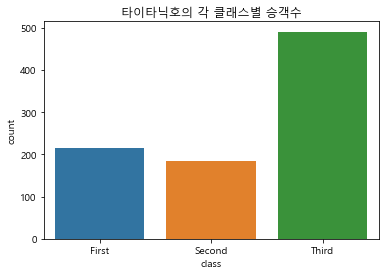

In [5]:
sns.countplot(x="class",data=titanic)
plt.title("타이타닉호의 각 클래스별 승객수")
plt.show()

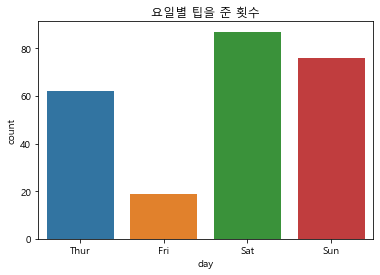

In [7]:
# 요일별 팁을 준 횟수
sns.countplot(x="day",data=tips)
plt.title("요일별 팁을 준 횟수")
plt.show()

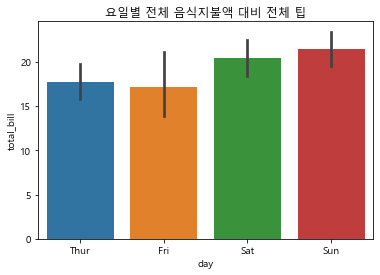

In [8]:
# barplot : 카테고리 값에 따른 값의 평균값을 표시하는 차트바
# 팁의 평균값이 막대에 표시된다.
sns.barplot(x="day",y="total_bill",data=tips)
plt.title("요일별 전체 음식지불액 대비 전체 팁")
plt.show()

In [12]:
flights.head()

year,1949,1950,1951,1952,1953,1954,1955,1956,1957,1958,1959,1960
month,,,,,,,,,,,,
Jan,112,115,145,171,196,204,242,284,315,340,360,417
Feb,118,126,150,180,196,188,233,277,301,318,342,391
Mar,132,141,178,193,236,235,267,317,356,362,406,419
Apr,129,135,163,181,235,227,269,313,348,348,396,461
May,121,125,172,183,229,234,270,318,355,363,420,472


In [14]:
# month(index), year(columns), passenger(values)
flights = flights.pivot("passengers","month","year")
plt.title("연도, 월별 승객수에 대한 HeapMap")
sns.heatmap(flights,annot=True, fmt="d", linewidths=1)
plt.show()

KeyError: 'passengers'

In [13]:
!pip install wordcloud

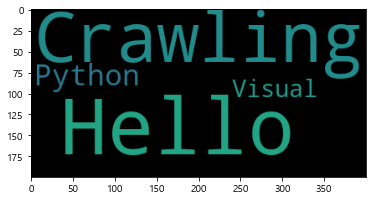

In [16]:
# 1. WordCloud 생성
import wordcloud

keywords = {"Hello":5,"Python":3,"Crawling":5,"Visual":2}

wc = wordcloud.WordCloud() # wordcloud 생성
cloud = wc.generate_from_frequencies(keywords) # 빈도에 맞게 wordcloud를 만들어주는 함수 사용

plt.figure()
plt.imshow(cloud)
plt.show()

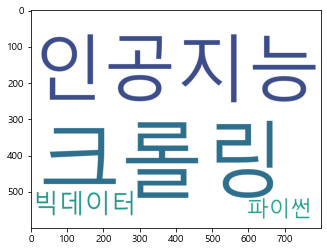

<Figure size 432x288 with 0 Axes>

In [19]:
# 한글 데이터 경우...한글 폰트를 지원하지 않기 때문에 한글이 꺠진다.
keywords = {"파이썬":2,"크롤링":6,"빅데이터":3,"인공지능":5}

wc = wordcloud.WordCloud(font_path="C:\Windows\Fonts\malgun.ttf",
                        background_color="white", width=800, height=600) #폰트 넣으면 한글 안꺠짐
cloud = wc.generate_from_frequencies(keywords)

plt.figure()
plt.imshow(cloud)
plt.show()
plt.savefig("wordCloud.png")